# 1. Preprocesss

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [106]:
code_path = '../data/sample_codes_stat@0.csv'
commit_path = '../data/sample_commits@0.csv'
author_path = '../data/sample_authors@1.1.csv'
code_dir = '../data/sample_codes@0/'

In [162]:
commit = pd.read_csv(commit_path,index_col=['bug'])
author = pd.read_csv(author_path,index_col=['author'])

  ## 1.1 Feature Complete
   ### 1.1.1 Code level data

In [108]:
!pip install lizard
import lizard
import pandas as pd

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [160]:
def code_analyze(code_dir):
    code_analyze_result = pd.DataFrame(columns=['bug','nloc','CCN','function_numbers','token_count','parameter_count'])
    for bug in bugs:
        tmp = {}
        code_path = code_dir + str(bug)
        code_analyst = lizard.analyze_file(code_path)
        tmp['bug'] = bug
        tmp['nloc'] = code_analyst.__dict__['nloc']
        tmp['function_numbers'] = len(code_analyst.function_list)
        tmp['token_count'] = code_analyst.__dict__['token_count']
        tmp['CCN'] = 0
        tmp['parameter_count']=0
        for function in code_analyst.function_list:
            tmp['CCN'] += function.__dict__['cyclomatic_complexity']
            tmp['parameter_count'] += len(function.__dict__['parameters'])
        code_analyze_result = code_analyze_result.append([tmp],ignore_index=True)
    return code_analyze_result  

In [177]:
bugs = pd.read_csv(commit_path)['bug']
code_stat = code_analyze(code_dir)
code_stat.to_csv(code_path,encoding='utf-8', index=False)  
print(code_stat)

               bug  nloc CCN function_numbers token_count parameter_count
0     6b6b604215c6  1329  82               17        8179              30
1        95f0b77ef    94   1                1         611               1
2     75bf47ebf6b5    42   4                2         321               3
3     13c589d5b0ac   151  13                3        1023               7
4     02051ca06371   862  67               27        7014              33
..             ...   ...  ..              ...         ...             ...
955   58e9cc90cda7    15   0                0         122               0
956   7f94ffbc4c6a   192   0                0        1513               0
957  97e1c18e8d17b   463   0                0        2715               0
958   2d253440b5af    16   0                0          63               0
959   76f0c53d08b9    28   0                0         205               0

[960 rows x 6 columns]


  ### 1.1.2 Commit level data

In [164]:
print(commit)

                                                    fix  fix_distance  \
bug                                                                     
6b6b604215c6   3c1dae0a07c651526f8e878d223a88f82caa5a50           1.0   
95f0b77ef      70479c012b67b89e219c40eddc5dc338b7c447a3           1.0   
75bf47ebf6b5   ca857cc1d4cf17aba4bbb3b95d35454ad96924b3           1.0   
13c589d5b0ac   f5c16f29bf5e57ba4051fc7785ba7f035f798c71           2.0   
02051ca06371   cd0e0ca69109d025b1a1b6609f70682db62138b0           2.0   
...                                                 ...           ...   
58e9cc90cda7   dc892e17bbae670a3d7aa6ab8bd1033b15b24645           1.5   
7f94ffbc4c6a   0600597c854e53d2f9b7a6a718c1da2b8b4cb4db           1.0   
97e1c18e8d17b  f37755490fe9bf76f6ba1d8c6591745d3574a6a6           2.0   
2d253440b5af   58886785db318588f95c8036abb2a47016c1f14c           1.0   
76f0c53d08b9   c9359f41620764822842d0c25908efdc019833f3           1.0   

               find_bug_time  fix_bug_time  
bug  

  ### 1.1.3 Author level data

In [165]:
author['bug_ratio'] = author['bug_commits_number']/ author['commits_number']
author['average_fix_distance'] = author['total_fix_distance']/ author['bug_commits_number']
author['average_find_bug_time'] = author['total_find_bug_time']/ author['bug_commits_number']
author['average_fix_bug_time'] = author['total_fix_bug_time']/ author['bug_commits_number']
print(author)

                  commits_number  bug_commits_number  total_fix_distance  \
author                                                                     
Zhuoyu Zhang                   1                   1                 1.5   
YunQiang Su                    2                   1                 1.0   
Yaogong Wang                   1                   1                 1.0   
Yan Laijun                     1                   1                 1.0   
Yangchun Fu                    1                   1                 1.0   
...                          ...                 ...                 ...   
Tomasz Duszynski              36                   2                 2.0   
Olliver Schinagl              33                   3                 3.0   
Nadia Derbey                  33                   1                 2.0   
Mihail Atanassov              33                   1                 3.0   
Mattias Wallin                33                   1                 1.0   

           

## 1.2 Preview
### 1.2.1 Features of Commit and Code 

In [180]:
code_stat = pd.read_csv(code_path,index_col=['bug'])
df = pd.merge(commit, code_stat,on='bug')
columns = ['fix_distance', 'find_bug_time', 'fix_bug_time', 'nloc','CCN', 'function_numbers', 'token_count', 'parameter_count']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 6b6b604215c6 to 76f0c53d08b9
Data columns (total 9 columns):
fix                 960 non-null object
fix_distance        960 non-null float64
find_bug_time       960 non-null float64
fix_bug_time        960 non-null float64
nloc                960 non-null int64
CCN                 960 non-null int64
function_numbers    960 non-null int64
token_count         960 non-null int64
parameter_count     960 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 75.0+ KB
None


In [181]:
df[columns].corr()

,fix_distance,find_bug_time,fix_bug_time,nloc,CCN,function_numbers,token_count,parameter_count
fix_distance,1.000000,0.094747,0.464420,0.016875,0.017255,0.023834,0.018747,0.024720
find_bug_time,0.094747,1.000000,0.772944,0.040321,0.029461,0.042959,0.022639,0.030533
fix_bug_time,0.464420,0.772944,1.000000,0.096331,0.079479,0.096506,0.079487,0.083239
nloc,0.016875,0.040321,0.096331,1.000000,0.821435,0.820217,0.981790,0.820028
CCN,0.017255,0.029461,0.079479,0.821435,1.000000,0.986264,0.813773,0.950504
function_numbers,0.023834,0.042959,0.096506,0.820217,0.986264,1.000000,0.810953,0.961576
token_count,0.018747,0.022639,0.079487,0.981790,0.813773,0.810953,1.000000,0.814749
parameter_count,0.024720,0.030533,0.083239,0.820028,0.950504,0.961576,0.814749,1.000000


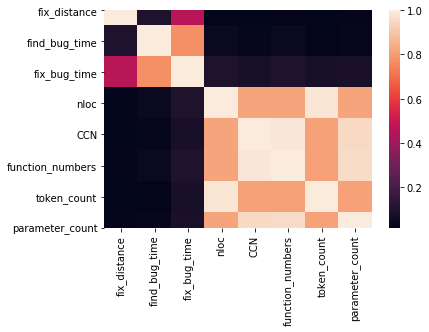

In [182]:
sns.heatmap(df[columns].corr())

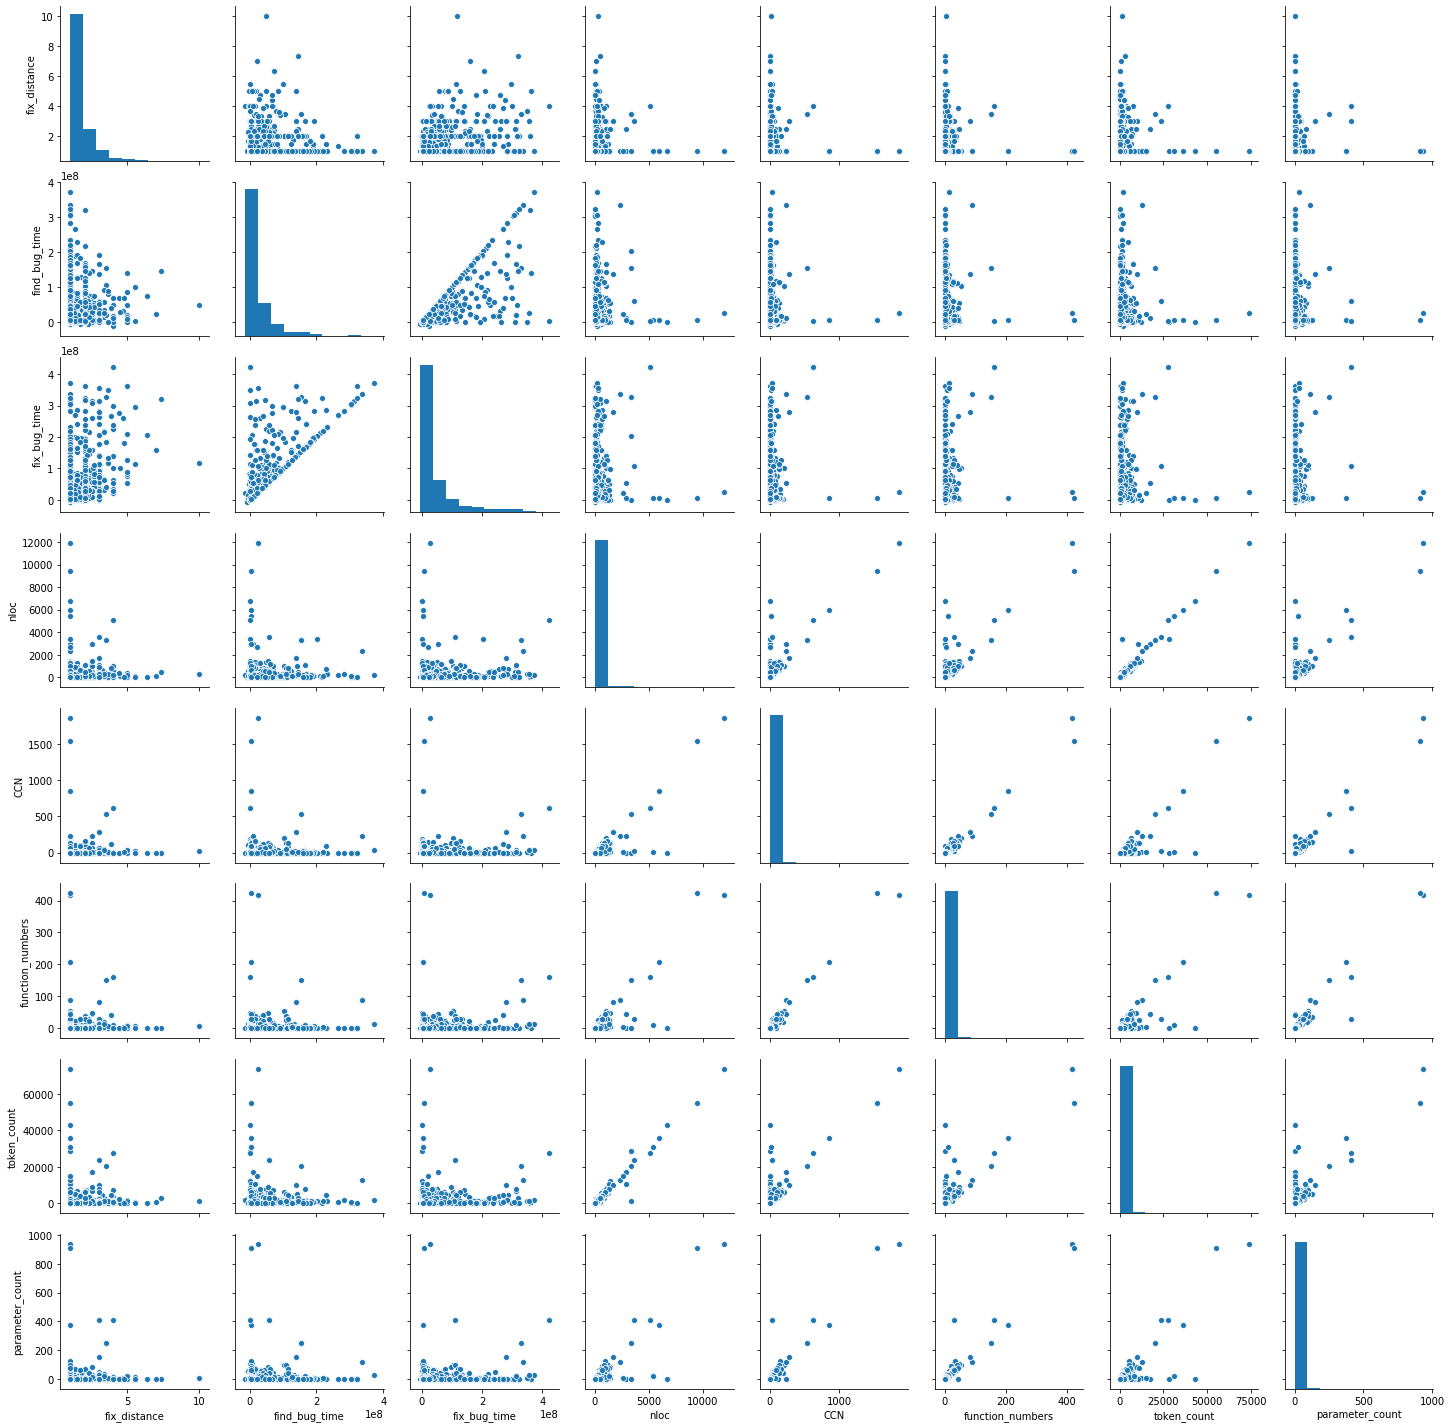

In [183]:
sns.pairplot(df[columns])     

### 1.2.2 Features of Author 

In [184]:
author.corr()

,commits_number,bug_commits_number,total_fix_distance,total_find_bug_time,total_fix_bug_time,bug_ratio,average_fix_distance,average_find_bug_time,average_fix_bug_time
commits_number,1.000000,0.340361,0.261966,0.062817,0.071193,-0.620137,0.005821,-0.032498,-0.019390
bug_commits_number,0.340361,1.000000,0.737228,0.166149,0.140359,-0.028173,-0.037210,-0.102167,-0.122678
total_fix_distance,0.261966,0.737228,1.000000,0.240300,0.441693,-0.035365,0.583317,0.012144,0.217314
total_find_bug_time,0.062817,0.166149,0.240300,1.000000,0.803702,-0.022275,0.128588,0.897292,0.688720
total_fix_bug_time,0.071193,0.140359,0.441693,0.803702,1.000000,-0.033072,0.475910,0.701918,0.893443
bug_ratio,-0.620137,-0.028173,-0.035365,-0.022275,-0.033072,1.000000,-0.021870,-0.011577,-0.022632
average_fix_distance,0.005821,-0.037210,0.583317,0.128588,0.475910,-0.021870,1.000000,0.136371,0.522601
average_find_bug_time,-0.032498,-0.102167,0.012144,0.897292,0.701918,-0.011577,0.136371,1.000000,0.775935
average_fix_bug_time,-0.019390,-0.122678,0.217314,0.688720,0.893443,-0.022632,0.522601,0.775935,1.000000


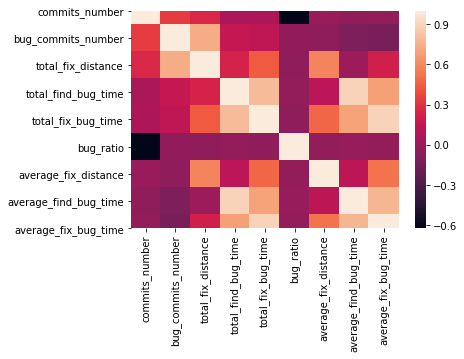

In [185]:
sns.heatmap(author.corr())

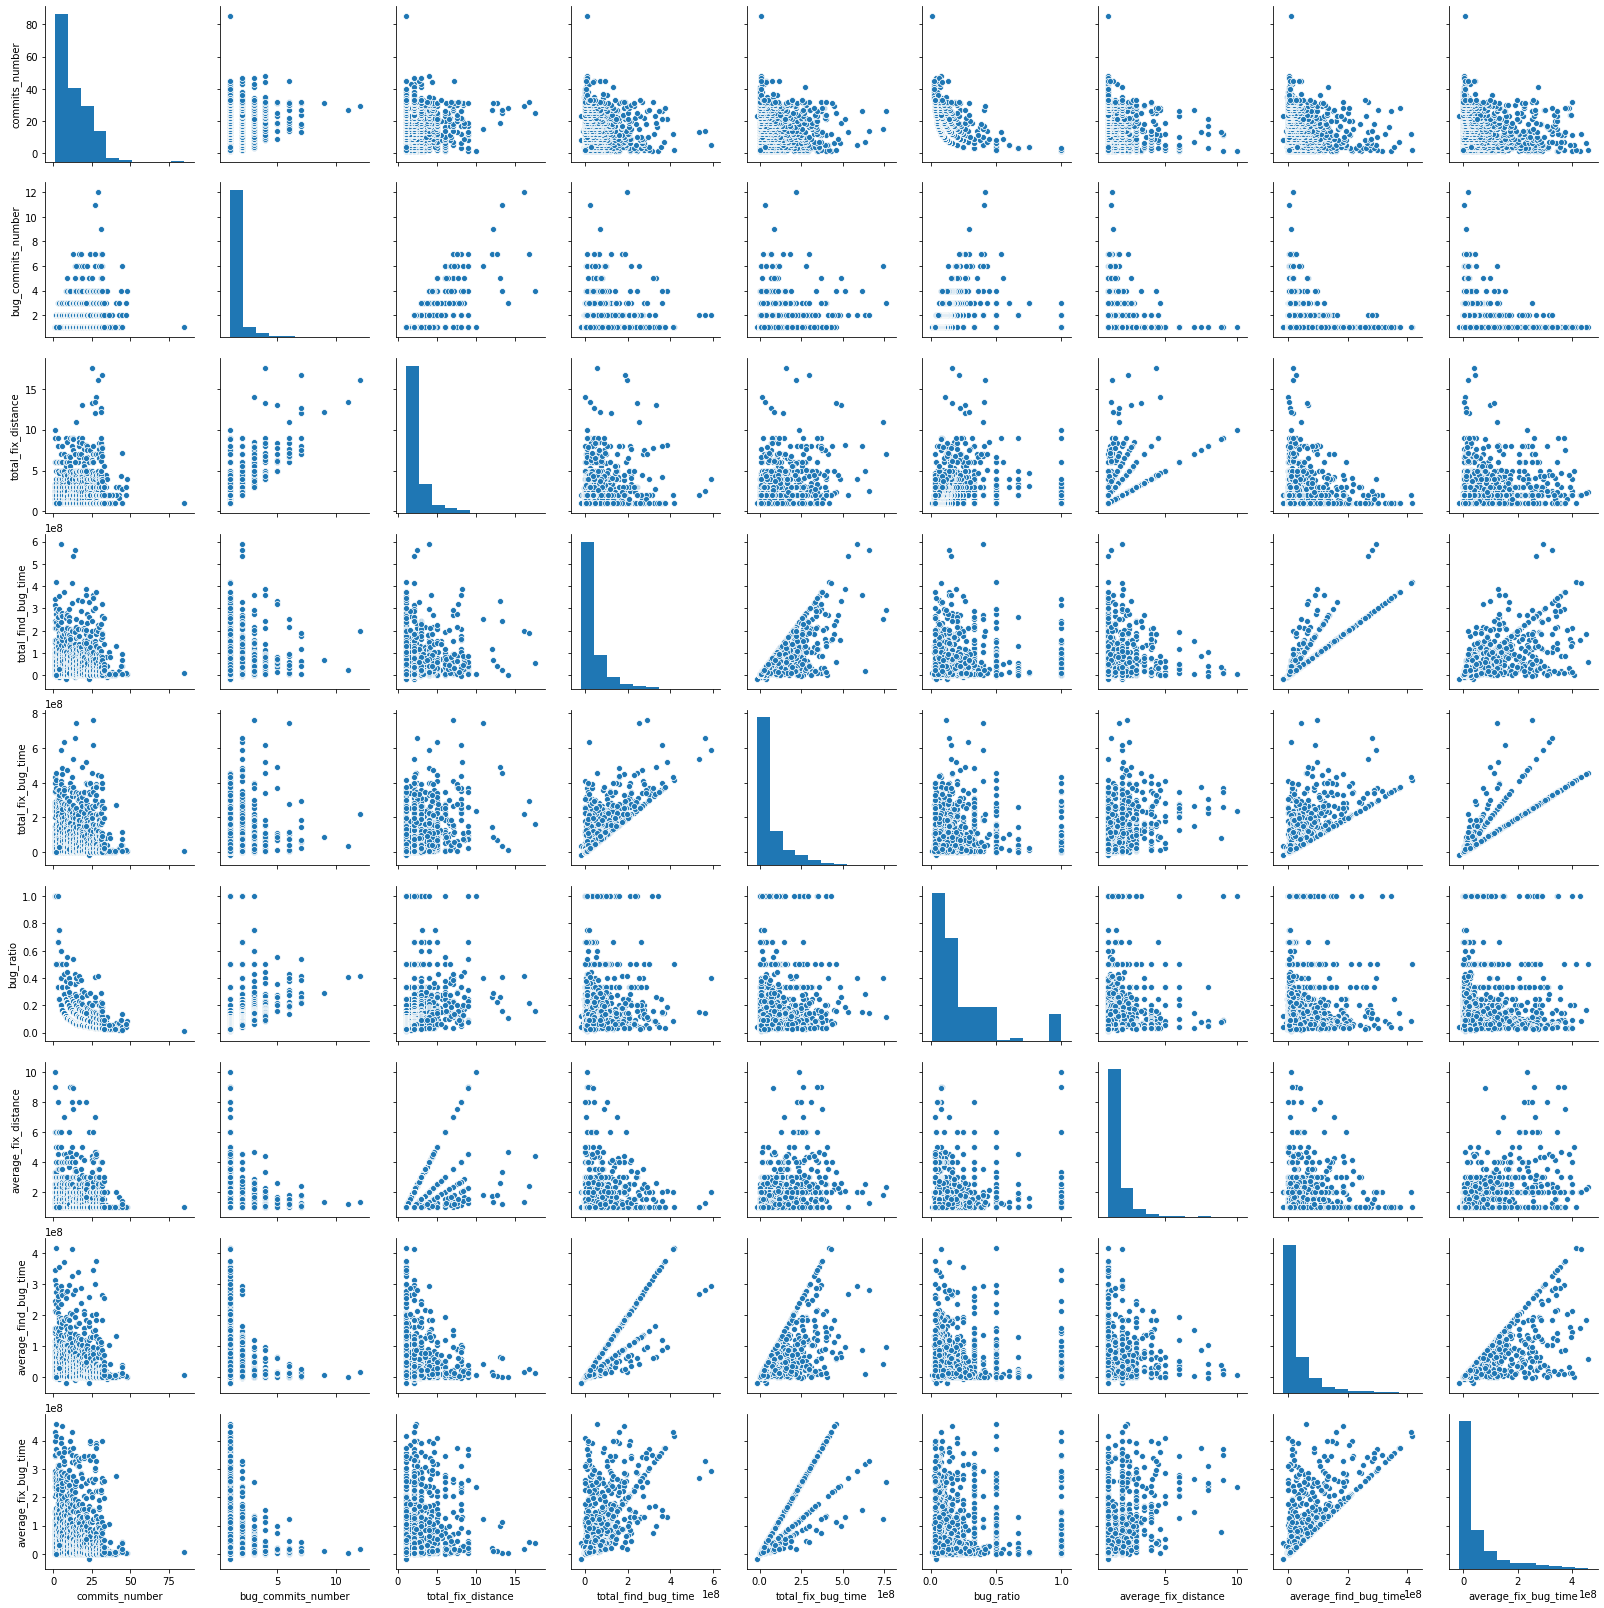

In [186]:
sns.pairplot(author)

## 1.3  Clean

## 1.4  Normalization